In [2]:
import pandas as pd
import numpy

In [3]:
police = pd.read_csv("Police-Blotter.csv")
sort_police = police.sort_values("INCIDENTNEIGHBORHOOD", inplace = True)

In [4]:
police.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
17893,2838132,16107592.0,6,2016-06-10T22:30:00,"Allegheny SQ & East Commons Pittsburgh, PA 15212",N,Allegheny Center,1,THEFT FROM AUTO,3304 Criminal Mischief. / 3934 Theft from Vehicle,2204.0,1.0,1.0,-80.003840,40.453434
189064,3114538,19216346.0,26,2019-10-23T14:59:00,"East Ohio ST & Cedar AV Pittsburgh, PA 15212",Y,Allegheny Center,1,DRUG PARAPHERNALIA,13(a)(32) Paraphernalia - Use or Possession,2204.0,1.0,1.0,-80.001697,40.453320
42689,2099230,5079795.0,99,2005-05-10T19:10:00,"BRIGHTON RD & PENNSYLVANIA AV PITTSBURGH, PA",Y,Allegheny Center,1,NaN,9498 302 (Mental),2204.0,1.0,1.0,-80.015348,40.456096
70968,2899700,17046357.0,26,2017-03-14T19:34:00,"100 Block South Commons Pittsburgh, PA 15212",Y,Allegheny Center,1,CRIMINAL TRESPASS,3503(b)(1)(i) Actual Communication,2204.0,1.0,1.0,-80.005189,40.451003
8878,2818870,16053508.0,99,2016-03-25T15:25:00,"200 Block East Ohio ST Pittsburgh, PA 15212",Y,Allegheny Center,1,NaN,9501 Bench Warrant,2204.0,1.0,1.0,-80.003660,40.453022


In [30]:
crimesPerNeighborhood = police['INCIDENTNEIGHBORHOOD'].value_counts()
crimesPerNeighborhood

South Side Flats               11726
Central Business District       8854
Carrick                         6605
Bloomfield                      5532
Shadyside                       5109
Squirrel Hill South             4298
Homewood South                  4295
East Liberty                    4282
Golden Triangle/Civic Arena     4278
Mount Washington                4008
Brookline                       3886
Knoxville                       3870
Lincoln-Lemington-Belmar        3817
Brighton Heights                3603
Homewood North                  3575
Central Oakland                 3490
East Allegheny                  3331
Allentown                       3102
Marshall-Shadeland              3062
North Oakland                   2973
Beechview                       2956
Sheraden                        2867
East Hills                      2859
Hazelwood                       2805
Central Lawrenceville           2724
Highland Park                   2671
Squirrel Hill North             2475
B

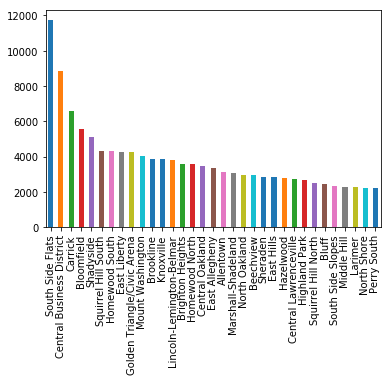

In [37]:
crimesPerNeighborhood.iloc[0:33].plot.bar()

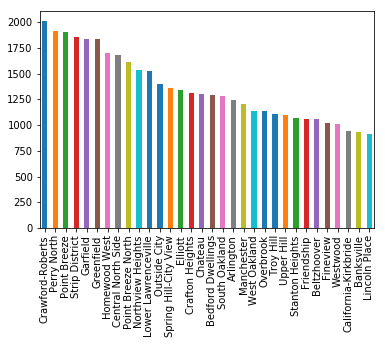

In [38]:
crimesPerNeighborhood.iloc[34:66].plot.bar()

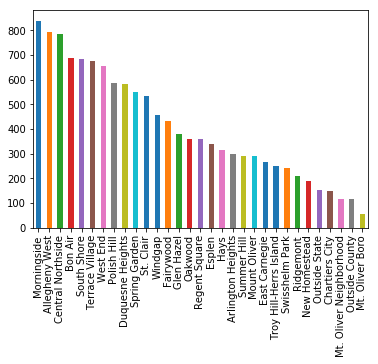

In [39]:
crimesPerNeighborhood.iloc[67:99].plot.bar()

In [21]:
typesOfCrimes = police['INCIDENTHIERARCHYDESC'].value_counts()
typesOfCrimes

THEFT FROM AUTO                               11159
THEFT/ALL OTHERS                               9122
SIMPLE ASSAULT/INJURY                          7624
CRIMINAL MISCHIEF (AUTO)                       7451
CRIMINAL MISCHIEF                              5312
HARRASSMENT/THREAT/ATTEMPT/PHY                 5144
RETAIL THEFT (SHOPLIFTING)                     5075
MTR VEH THEFT (AUTO)                           4257
MARIJUANA-POSSESS                              3414
BURGLARY/FORCE ENT/RES                         3117
HARRASSMENT BY COMUN/ADDRESS                   3001
BURGLARY/NO FORCE/RES                          2736
HARRASSMENT-OTHER                              2733
PUBLIC DRUNKENESS                              2677
TERRORISTIC THREATS                            2645
THEFT/PROP-LOST/MISLAID/DEL                    2460
ALL OTHER OFFENSES(EXPT TRAFF)                 2271
DRIVING UNDER INFLUENCE                        2267
THEFT FROM BUILDING                            2085
OPIUM/COCAIN